### Import Statements:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Linear Regression with Single Variable:

### Data Description:


        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
               0          1
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


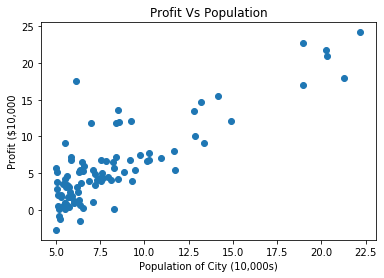

In [32]:
data=pd.read_csv(r'https://raw.githubusercontent.com/IITGuwahati-AI/Learning-Content/master/Phase%203%20-%202020%20(Summer)/Week%202%20(Apr%205%20-%20Apr%2011)/Exercise1/Data/ex1data1.txt',header=None)
print(data.head())
print("==============================================")
print(data.describe())
print("==============================================")
plt.scatter(data[0],data[1])
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Vs Population")
plt.show()

### Calculating the Cost Function:

In [33]:
def computeCost(X,y,theta):
    
    m=len(y)                        #Size of Dataset
    predictions=X.dot(theta)        #Hypothesis
    square_err=(predictions - y)**2 #Cost Function
    
    return 1/(2*m) * np.sum(square_err) #J(Theta)

#For adding x0 value of 1

data_n=data.values
m=len(data_n[:,-1])
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))
cc=computeCost(X,y,theta)
print("Computed Cost Function is: {}".format(cc))

Computed Cost Function is: 32.072733877455676


### Gradient Descent Implementation and Visualization:

h(x) =-3.63 + 1.17x1


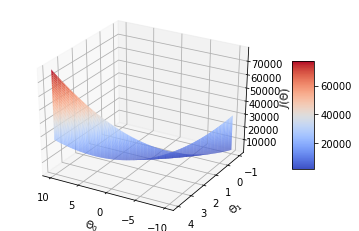

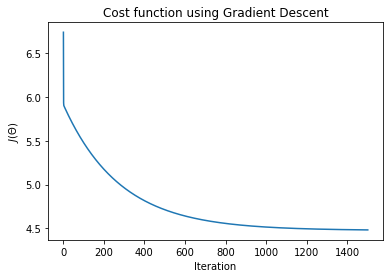

In [25]:
def gradientDescent(X,y,theta,alpha,num_iters):

    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,120)
plt.show()

xa=[i+1 for i in range(1500)]
plt.plot(xa,J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()


### Plotting Best-Fit Line:

Text(0.5, 1.0, 'Profit vs Population')

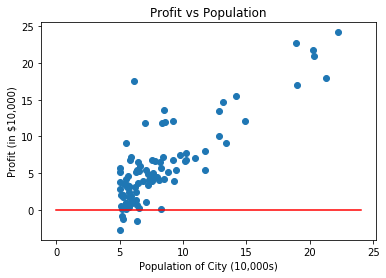

In [34]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit (in $10,000)")
plt.title("Profit vs Population")

### Predictions:

In [27]:
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

predict2=predict(np.array([1,7]),theta)*10000
print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))


For population = 35,000, we predict a profit of $4520.0
For population = 70,000, we predict a profit of $45342.0


# Linear Regression with Multiple Variables:

### Data Description:

In [36]:
data2=pd.read_csv("https://raw.githubusercontent.com/IITGuwahati-AI/Learning-Content/master/Phase%203%20-%202020%20(Summer)/Week%202%20(Apr%205%20-%20Apr%2011)/Exercise1/Data/ex1data2.txt", header=None)
data2.head()
print(data2.describe())

                 0          1              2
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


### Feature Normalization and Hypothesis:

In [37]:
def featureNormalization(X):
    
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

data_n2=data2.values
m2=len(data_n2[:,-1])
X2=data_n2[:,0:2].reshape(m2,2)
X2, mean_X2, std_X2 = featureNormalization(X2)
X2 = np.append(np.ones((m2,1)),X2,axis=1)
y2=data_n2[:,-1].reshape(m2,1)
theta2=np.zeros((3,1))

theta2, J_history2 = gradientDescent(X2,y2,theta2,0.01,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =334302.06 + 99411.45x1 + 3267.01x2


### Gradient Descent Analysis:


Text(0.5, 1.0, 'Cost function using Gradient Descent')

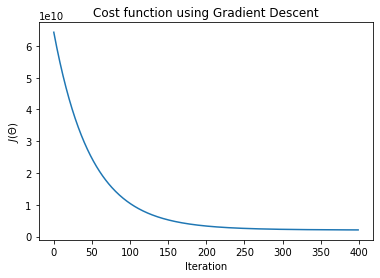

In [38]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Predictions:

In [39]:
def predict(x,theta):
 
    predictions= np.dot(theta.transpose(),x) 
    return predictions[0]

x_sample = featureNormalization(np.array([1650,3]))[0]
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))


For size of house = 1650, Number of bedroom = 3, we predict a house value of $430447.0
